# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train           = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test             = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

n_valid = valid['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = int(list(csv.reader(open("signnames.csv", "r"), delimiter = ","))[-1][0]) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

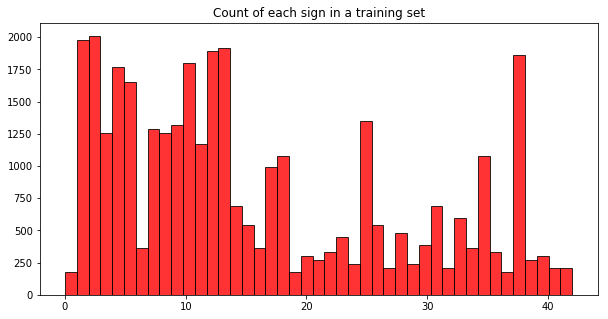

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Count of each sign in a training set")
x = train['labels']
ax.hist(x,n_classes,color='red',edgecolor='black',alpha=0.8)
plt.show()

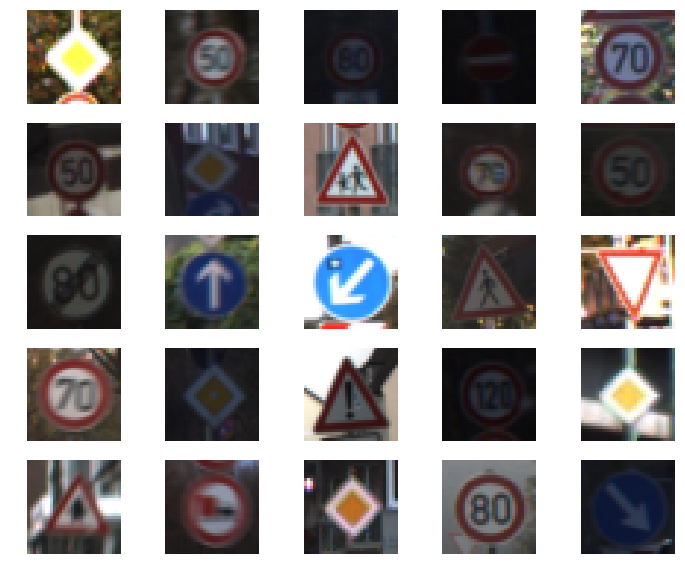

In [5]:
#Example signs
import random
f, axarr = plt.subplots(5, 5, figsize=(12, 10))
for i in range(5):
    for j in range(5):
        index = random.randint(0, n_train)
        axarr[i, j].imshow(train['features'][index])
        axarr[i, j].axis("off")
f.subplots_adjust(hspace=.2)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
import cv2

##Random perspective transformation (dist -> distance from border to cut)
def transformImage(image):
    dist = random.randint(1, 3)
    x, y = image.shape[:2]
    pts1 = np.float32([[dist,dist],[x-dist, dist],[dist, y-dist],[x-dist,y-dist]])
    pts2 = np.float32([[0,0],[x,0],[0,y],[x,y]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    return cv2.warpPerspective(image,M,(x,y))

##Random rotation
def rotateImage(image):
    angle = random.randint(-30, 30)
    image_center = tuple(np.array(image.shape[:2])/2)
    rot_mat = cv2.getRotationMatrix2D(image_center,angle,1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[:2],flags=cv2.INTER_LINEAR)

##Random translation
def translateImage(image):
    mx = random.randint(-3,3)
    my = random.randint(-3,3)
    rows,cols = image.shape[:2]
    M = np.float32([[1,0,mx],[0,1,my]])
    return cv2.warpAffine(image,M,(cols,rows))

def normalize(image):
    min, max = 0, 256
    return (image - (max-min)/2) / (max-min)

def sharpen(image):
    kernel = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0
    return cv2.filter2D(image, -1, kernel)

## Project writeup #1

#### Preprocessing
I preprocessed all images with following techniques (in order as follows):
* grayscale
* histogram equalization using CLAHE (Contrast Limited Adaptive Histogram Equalization) algorithm
* sharpening using gaussian filter
* normalization to [-1, 1] values

After analysis of the problem and reading papers on it, I chose to use grayscale on first place as colors are not that significant on the problem, and having color images could generate more problems on brightness of the images. With grayscale images it was easy to equalize them using histogram equalization algorithms. I found reference to CLAHE algorithm on openCV documentation (http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html) and after comparing with default histogram equalization I noticed that is generated better results. Parametes I finally used (clipLimit=2.0, tileGridSize=(5,5)) are the outcome of various testing.
Sharpening was something I added at the very end, I thought it is not needed after histogram equalization, but it actually resulted in some improvement of accuracy.

I generated additional data via transformation of existing images:
* random perspective transformation
* random rotation
* random translation

I found those techniques in openDC documentation (http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html) and I found them useful to generate additional data. I mostly generated images rotated in different angles (varying from -30 to 30 degrees) to exclude any dependency on angle of the image. Transforming is useful in this case as in most cases signs are located in the center of the image, so reducing the surroundings gives stronger focus on the sign itself. Translating images helps to prevent dependency from the location of the sign on the image.

Finally the dataset consisted of 393588 images.

In following steps I show the outcome off all used techniques:

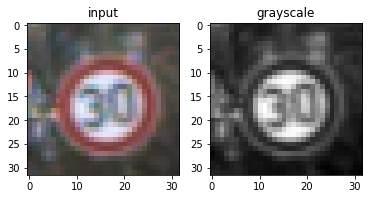

In [11]:
import cv2
#Grayscale
image = train['features'][random.randint(0, n_train)]
plt.figure(figsize=(6, 5))
plt.subplot(121).set_title("input")
plt.imshow(image)
plt.subplot(122).set_title("grayscale")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap="gray")

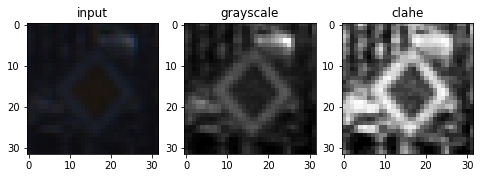

In [12]:
#CLAHE
image = train['features'][random.randint(0, n_train)]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
plt.figure(figsize=(8, 5))
plt.subplot(131).set_title("input")
plt.imshow(image)
plt.subplot(132).set_title("grayscale")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap="gray")
plt.subplot(133).set_title("clahe")
plt.imshow(clahe.apply(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)), cmap="gray")

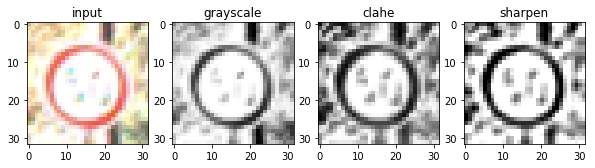

In [13]:
#sharpen
image = train['features'][random.randint(0, n_train)]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
plt.figure(figsize=(10, 5))
plt.subplot(141).set_title("input")
plt.imshow(image)
plt.subplot(142).set_title("grayscale")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap="gray")
plt.subplot(143).set_title("clahe")
plt.imshow(clahe.apply(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)), cmap="gray")
plt.subplot(144).set_title("sharpen")
plt.imshow(sharpen(clahe.apply(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))), cmap="gray")

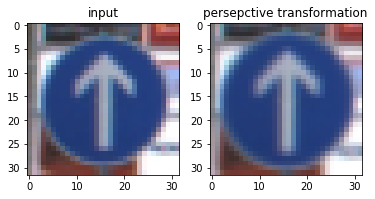

In [14]:
#Perspective transformation
image = train['features'][random.randint(0, n_train)]
plt.figure(figsize=(6, 5))
plt.subplot(121).set_title("input")
plt.imshow(image)
plt.subplot(122).set_title("persepctive transformation")
plt.imshow(transformImage(image))

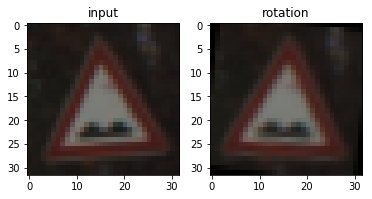

In [23]:
#Rotation
image = train['features'][random.randint(0, n_train)]
plt.figure(figsize=(6, 5))
plt.subplot(121).set_title("input")
plt.imshow(image)
plt.subplot(122).set_title("rotation")
plt.imshow(rotateImage(image))

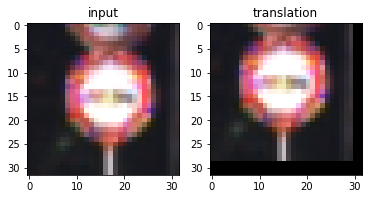

In [27]:
#Translation
image = train['features'][random.randint(0, n_train)]
plt.figure(figsize=(6, 5))
plt.subplot(121).set_title("input")
plt.imshow(image)
plt.subplot(122).set_title("translation")
plt.imshow(translateImage(image))

In [28]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
X_validation, y_validation = valid['features'], valid['labels']
X_train, y_train = shuffle(train['features'], train['labels'])
n_train = train['features'].shape[0]

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
X_train_gray = [(normalize(sharpen(clahe.apply(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY))))).reshape(32,32,1) for i in range(n_train)]
y_train_gray = y_train
X_validation_gray = [(normalize(sharpen(clahe.apply(cv2.cvtColor(X_validation[i], cv2.COLOR_BGR2GRAY))))).reshape(32,32,1) for i in range(n_valid)]
y_validation_gray = y_validation

In [29]:
X_test_gray = [(normalize(sharpen(clahe.apply(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY))))).reshape(32,32,1) for i in range(n_test)]
y_test_gray = y_test

In [31]:
x_rotated = []
y_rotated = np.empty((0,0))
nb_new_images = 8
for i in range(n_train):
    for j in range(nb_new_images):
        im = rotateImage(X_train_gray[i])
        x_rotated.append(im.reshape(32,32,1))
        y_rotated = np.append(y_rotated, y_train_gray[i])

In [32]:
x_translated = []
y_translated = np.empty((0,0))
nb_new_images = 2
for i in range(n_train):
    for j in range(nb_new_images):
        im = translateImage(X_train_gray[i])
        x_translated.append(im.reshape(32,32,1))
        y_translated = np.append(y_translated, y_train_gray[i])

In [33]:
x_transformed = []
y_transformed = np.empty((0,0))
nb_new_images = 1
for i in range(n_train):
    for j in range(nb_new_images):
        im = transformImage(X_train_gray[i])
        x_transformed.append(im.reshape(32,32,1))
        y_transformed = np.append(y_transformed, y_train_gray[i])

In [34]:
X_train_gray = X_train_gray + x_rotated
X_train_gray = X_train_gray + x_translated
X_train_gray = X_train_gray + x_transformed

y_train_gray = np.append(y_train_gray, y_rotated)
y_train_gray = np.append(y_train_gray, y_translated)
y_train_gray = np.append(y_train_gray, y_transformed)

n_train = len(X_train_gray)
X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)

### Model Architecture

## Project writedown #2

I started my model from LeNet, I played with it for some time and I ended up with following model:

| Layer | Description  |
|-|-|
| Input | 32x32x1 Grayscale images|
| Convolutional layer 3x3x16 | Output: 30x30x16|
| Max-pooling 2x2x1 | Output: 15x15x16|
| Dropout | 0.9|
| Convolutional layer 3x3x32 | Output: 13x13x32|
| Max-pooling 2x2x1 | Output: 6x6x32|
| Dropout | 0.9|
| Convolutional layer 3x3x64 | Output: 4x4x64|
| Max-pooling 2x2x1 | Output: 2x2x64|
| Dropout | 0.9|
| Convolutional layer 2x2x128 | Output: 1x1x128|
| Dropout | 0.9|
| Join flattened outputs from last and one-before-last convolutional layers | Output: 384|
| Fully connected layer | 384 -> 384 |
| Dropout | 0.9|
| Fully connected layer | 384 -> 43 |

I added more convolution layers for deeper analysis of the image, as the output of the last layer is 1x1x128 I joined it with the previous one which is 3x3x64 for more information. I used small dropout for each layers to avoid overfitting with the train set that contains transformed copies of the same images. I added one fully connected layer before the last, which did not improve the accuracy significantly, but still, a little.

In [35]:
def conv(x, shape, strides, padding, pool_ksize, pool_strides, pool_padding, mu, sigma, dropout):
    conv1_w = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(shape[3]))
    conv1_strides = strides
    conv1_padding = padding
    conv1 = tf.nn.conv2d(x, conv1_w, conv1_strides, conv1_padding) + conv1_b
    print(conv1.get_shape())

    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, dropout)

    conv1 = tf.nn.max_pool(conv1, ksize = pool_ksize, strides = pool_strides, padding = pool_padding)
    print(conv1.get_shape())
    return conv1
    
def fc(x, shape, mu, sigma, dropout):
    fc1_w = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(shape[1]))
    fc1 = tf.add(tf.matmul(x, fc1_w), fc1_b)
    
    #Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    return fc1

In [36]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


import tensorflow as tf

from tensorflow.contrib.layers import flatten

def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout = 0.9

    #conv0 = conv(x, (1, 1, 1, 3), [1, 1, 1, 1], 'VALID', [1, 1, 1, 1], [1, 1, 1, 1], 'VALID', mu, sigma, dropout)
    #input = 32x32x1. Output = 30x30x8, Pooling output = 15x15x8
    conv1 = conv(x, (3, 3, 1, 16), [1, 1, 1, 1], 'VALID', [1, 2, 2, 1], [1, 2, 2, 1], 'VALID', mu, sigma, dropout)
    #input = 15x15x8. Output = 13x13x16, Pooling output = 6x6x16
    conv2 = conv(conv1, (3, 3, 16, 32), [1, 1, 1, 1], 'VALID', [1, 2, 2, 1], [1, 2, 2, 1], 'VALID', mu, sigma, dropout)
    #input = 6x6x16. Output = 4x4x32, Pooling output = 2x2x32
    conv3 = conv(conv2, (3, 3, 32, 64), [1, 1, 1, 1], 'VALID', [1, 2, 2, 1], [1, 2, 2, 1], 'VALID', mu, sigma, dropout)
    #input = 2x2x64. Output = 1x1x128, Pooling output = 1x1x128
    conv4 = conv(conv3, (2, 2, 64, 128), [1, 1, 1, 1], 'VALID', [1, 1, 1, 1], [1, 1, 1, 1], 'VALID', mu, sigma, dropout)
    
    out_conv1 = tf.contrib.layers.flatten(conv3)
    out_conv2 = tf.contrib.layers.flatten(conv4)
    out = tf.concat_v2([out_conv1, out_conv2], 1)
    fc1 = fc(out, (384, 384), mu, sigma, dropout)

    fc_final_w = tf.Variable(tf.truncated_normal(shape=(384, 43), mean=mu, stddev=sigma))
    fc_final_b = tf.Variable(tf.zeros(43))
    fc_final = tf.add(tf.matmul(fc1, fc_final_w), fc_final_b)
    logits = fc_final
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## Project writedown #3

I used the training model from LeNet class from the course. I was playing with different methods, for example I was testing other optimizers, like Adagrad or GradientDescent, but it got only worse, so I kept the initial model.

I used 25 epochs and batch size of 64. Number of epochs was more than enough, but I was curious if anything strange can happen after many of them. This batch size gave me the best result and was the smallest that my GPU could handle in reasonable time.

I used the code for the training process from the course. I was checking accuracy during the evaluation on validation set and at the end checked final result on test set.

Final results of the training were:
* Training accuracy ~97%
* Testing accuracy ~96%

In [37]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

(?, 30, 30, 16)
(?, 15, 15, 16)
(?, 13, 13, 32)
(?, 6, 6, 32)
(?, 4, 4, 64)
(?, 2, 2, 64)
(?, 1, 1, 128)
(?, 1, 1, 128)


In [38]:
EPOCHS = 25
BATCH_SIZE = 64

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train_gray[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation_gray, y_validation_gray)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './classifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.956

EPOCH 2 ...
Validation Accuracy = 0.953

EPOCH 3 ...
Validation Accuracy = 0.962

EPOCH 4 ...
Validation Accuracy = 0.962

EPOCH 5 ...
Validation Accuracy = 0.973

EPOCH 6 ...
Validation Accuracy = 0.968

EPOCH 7 ...
Validation Accuracy = 0.969

EPOCH 8 ...
Validation Accuracy = 0.965

EPOCH 9 ...
Validation Accuracy = 0.978

EPOCH 10 ...
Validation Accuracy = 0.970

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.971

EPOCH 13 ...
Validation Accuracy = 0.971

EPOCH 14 ...
Validation Accuracy = 0.969

EPOCH 15 ...
Validation Accuracy = 0.969

EPOCH 16 ...
Validation Accuracy = 0.971

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.965

EPOCH 19 ...
Validation Accuracy = 0.971

EPOCH 20 ...
Validation Accuracy = 0.971

EPOCH 21 ...
Validation Accuracy = 0.963

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.970

EPOCH 24 ...
Validation Accura

In [41]:
#Test on test set
with tf.Session() as sess:
    saver.restore(sess, "./classifier")

    test_accuracy = evaluate(X_test_gray, y_test_gray)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

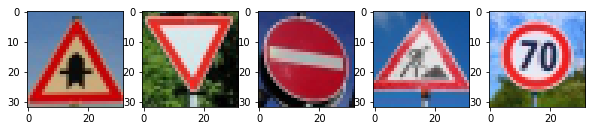

In [42]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
images_x = []
images_y = np.empty((0,0))

def addImages(labels):
    global images_x, images_y
    for label in labels:
        images_x.append(cv2.cvtColor(cv2.imread('./5germansigns/' + label + '.jpg' ), cv2.COLOR_BGR2RGB))
        images_y = np.append(images_y, label)

addImages(["11", "13", "17", "25", "4"])

plt.figure(figsize=(10,10))
plt.subplot(151)
plt.imshow(images_x[0])
plt.subplot(152)
plt.imshow(images_x[1])
plt.subplot(153)
plt.imshow(images_x[2])
plt.subplot(154)
plt.imshow(images_x[3])
plt.subplot(155)
plt.imshow(images_x[4])

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [43]:
#Preprocessing
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
images_gray_x = []
for im in images_x:
    images_gray_x.append(normalize(sharpen(clahe.apply(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)))).reshape(32,32,1))

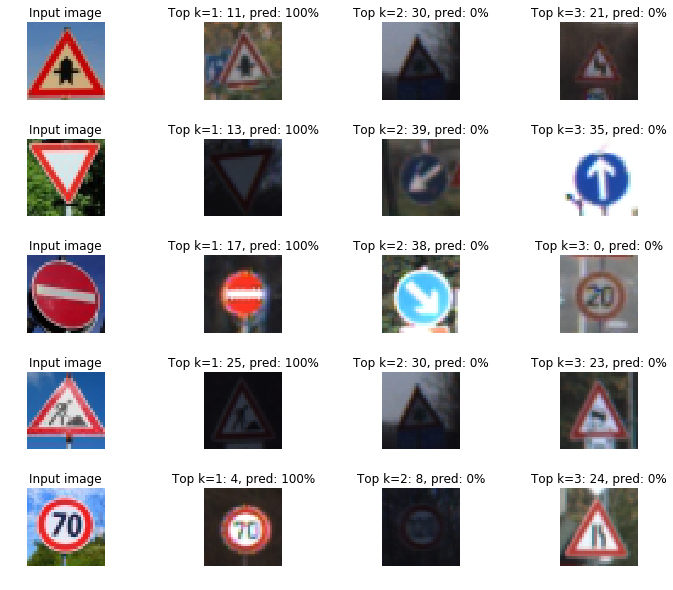

In [44]:
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph("./classifier.meta")
    saver.restore(sess, "./classifier")
    top = sess.run(top_k, feed_dict={x: images_gray_x})
    f, axarr = plt.subplots(5, 4, figsize=(12, 10))
    for i in range(5):
        axarr[i, 0].imshow(images_x[i])
        axarr[i, 0].set_title('Input image')
        axarr[i, 0].axis("off")
        for j in range(1,4):
            axarr[i, j].imshow(X_train[np.argwhere(y_train == top[1][i][j-1])[0]][0])
            axarr[i, j].set_title('Top k={}: {}, pred: {:.0f}%'.format(j,top[1][i][j-1], 100.0*top[0][i][j-1]))
            axarr[i, j].axis("off")
    f.subplots_adjust(hspace=.5, wspace=.3)

### Analyze Performance

In [45]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [46]:
#Test on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images_gray_x, images_y)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

Test Accuracy = 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [47]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph("./classifier.meta")
    saver.restore(sess, "./classifier")
    top = sess.run(top_k, feed_dict={x: images_gray_x})
    for i in range(5):
        print("Image {}. Top_k probabilities:".format(str(i+1)))
        for j in range(5):
            print("k = {}: {}".format(j+1, top[0][i][j]))
            

Image 1. Top_k probabilities:
k = 1: 0.9999998807907104
k = 2: 6.416733810965525e-08
k = 3: 2.2960403814394724e-19
k = 4: 1.4069129882941728e-19
k = 5: 2.7548843173120846e-20
Image 2. Top_k probabilities:
k = 1: 1.0
k = 2: 0.0
k = 3: 0.0
k = 4: 0.0
k = 5: 0.0
Image 3. Top_k probabilities:
k = 1: 1.0
k = 2: 2.1630009029105567e-36
k = 3: 0.0
k = 4: 0.0
k = 5: 0.0
Image 4. Top_k probabilities:
k = 1: 1.0
k = 2: 0.0
k = 3: 0.0
k = 4: 0.0
k = 5: 0.0
Image 5. Top_k probabilities:
k = 1: 1.0
k = 2: 1.4407384061070287e-27
k = 3: 4.9191527869821e-29
k = 4: 5.330480437211241e-33
k = 5: 1.1619449417191375e-33


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

## Project writeup#4

Giving the 5 images of German traffic signs found on the Internet I see that my model predicts the signs correctly.